# Topic modeling


## Julien Velcin

<!--<div style="margin-left: 10px;">Laboratoire ERIC</div>
<div style="margin-left: 10px;">Université Lyon 2</div>-->

Laboratoire ERIC<br/>
Université Lyon 2

[@jvelcin](https://twitter.com/jvelcin)

[http://mediamining.univ-lyon2.fr/velcin/](http://mediamining.univ-lyon2.fr/velcin/)

All the code has been tested on **R version 3.2.2**.

For the notebook and slideshow generation, I've used ipython 4.0.1 and RISE plugin:

Reveal.js - Jupyter/IPython Slideshow Extension<br/>
http://bollwyvl.github.io/live_reveal/

For the rest of the talk, I will showcase on a famous best-seller:

<img src="img/phil_stone.jpg" style='height: 400px'/>

However, I cannot distribute the data for obvious copyright issues. Instead, feel free to use the numerous **open data**! 

<img src="img/gutenberg.png" style='height: 600px'/>

http://www.gutenberg.org

For the purpose of this tutorial, I use the **MALLET package** (wrapper of the UMass Java library).

http://mallet.cs.umass.edu/about.php

    @unpublished{McCallumMALLET,
      author = "Andrew Kachites McCallum",
      title = "MALLET: A Machine Learning for Language Toolkit",
      note = "http://mallet.cs.umass.edu",
      year = 2002}

In [12]:
options(warn=-1)
library(rJava)
library(mallet)

Reading the data file

In [14]:
hp <- readLines("data/HP1.txt", encoding="UTF-8")
lda.id <- 1:length(hp)

# setting the delimiters
token.regexp <- "\\p{L}[\\p{L}\\p{P}]+\\p{L}"

# using my own stop list for English
stoplist <- "data/en2.txt"

# including stopwords
mallet.instances <- mallet.import(as.character(lda.id), hp, stoplist, token.regexp = token.regexp)
#mallet.instances <- mallet.import(as.character(lda.id), hp, "data/empty.txt", token.regexp = token.regexp)

Estimation of LDA parameters

In [15]:
# number of expected topics
k <- 100

# preparation
topic.model <- MalletLDA(num.topics=k)
topic.model$loadDocuments(mallet.instances)
vocabulary <- topic.model$getVocabulary()
word.freqs <- mallet.word.freqs(topic.model)

# train the model
topic.model$train(1000)
topic.model$maximize(10)

Check the vocabulary

In [16]:
head(vocabulary, 20)
head(word.freqs)

[1] "chapter"   "one"       "boy"       "lived"     "mrs"       "dursley"  
 [7] "number"    "four"      "privet"    "drive"     "proud"     "say"      
[13] "perfectly" "normal"    "thank"     "much"      "last"      "people"   
[19] "expect"    "involved"

,words,term.freq,doc.freq
1,chapter,0,0
2,one,252,225
3,boy,82,78
4,lived,8,7
5,mrs,46,38
6,dursley,54,37


What are the top words?

In [92]:
options(repr.plot.width=10, repr.plot.height=8)
index.frequent.words <- order(word.freqs$term.freq, decreasing=T)
freq <- word.freqs[index.frequent.words[1:50],]$term.freq
names(freq) <- word.freqs[index.frequent.words[1:50],]$words

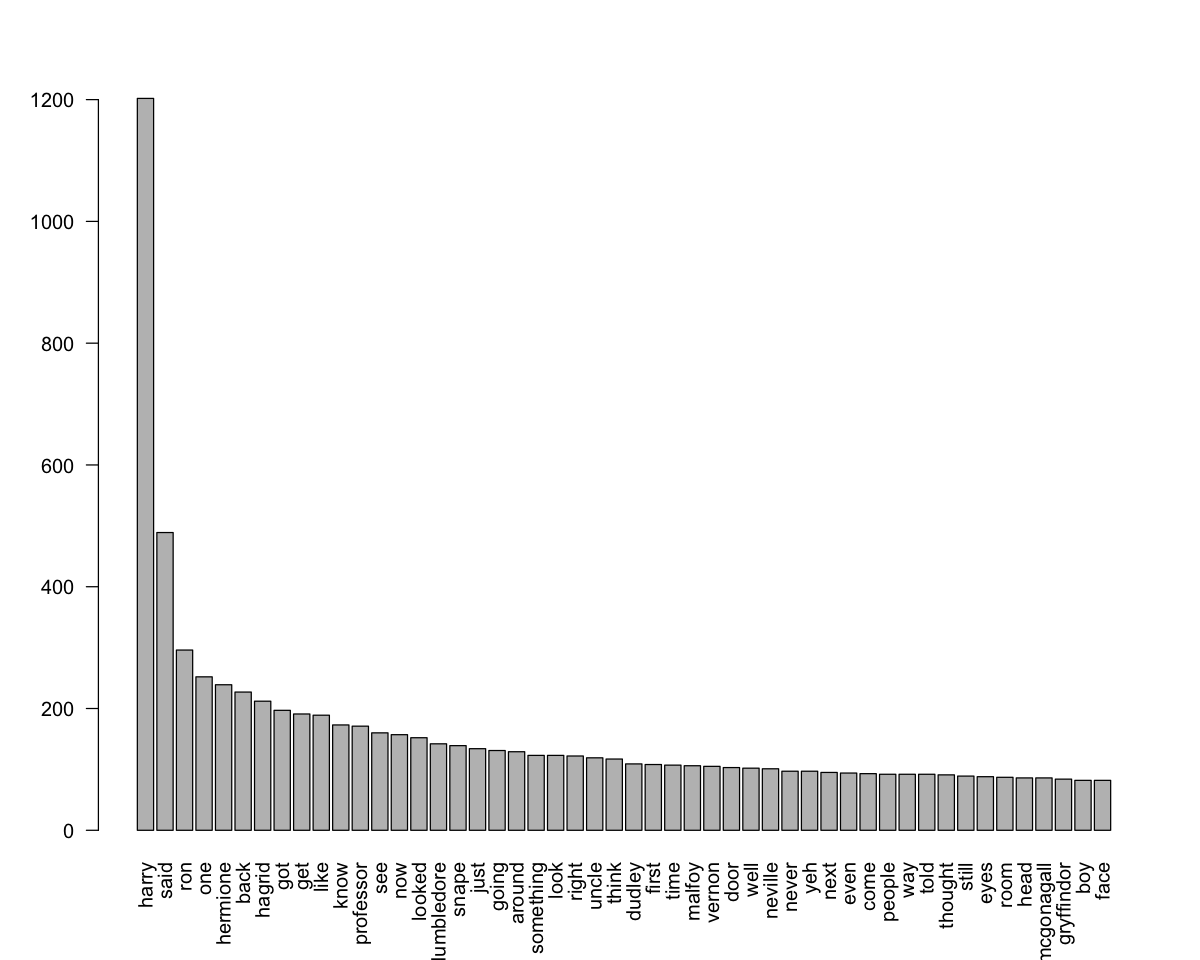

In [93]:
barplot(freq, las=2)

Inspect p(z/d) and p(w/z)

In [17]:
# docs x topics matrix
doc.topics <- mallet.doc.topics(topic.model, smoothed=T, normalized=T)

# topics x words matrix
topic.words <- mallet.topic.words(topic.model, smoothed=T, normalized=T)

In [18]:
topic.todisp <- 1:20
m.disp <- do.call(cbind,
                  sapply(topic.todisp,
                         function(x) format(mallet.top.words(topic.model, topic.words[x,]))))
colnames(m.disp) <- sapply(topic.todisp, function(x) c(paste("z",x), "p(w/z)"))
m.disp

z 1,p(w/z),z 2,p(w/z),z 3,p(w/z),z 4,p(w/z),z 5,p(w/z),,z 16,p(w/z),z 17,p(w/z),z 18,p(w/z),z 19,p(w/z),z 20,p(w/z)
uncle,0.12493604,peeves,0.11001920,magic,0.13793287,minutes,0.08237557,left,0.06950742,<8b>,dragon,0.07601331,hands,0.06729758,people,0.08395925,books,0.09360706,every,0.04759043
aunt,0.12070149,please,0.10122044,real,0.04968371,five,0.04657240,london,0.05648121,<8b>,norbert,0.05349743,passed,0.05384338,dursley,0.02940728,library,0.04130938,flavor,0.03894383
petunia,0.10588055,mistake,0.04402852,neither,0.03865256,heard,0.04299208,right,0.04779707,<8b>,hagrid,0.05068295,people,0.05047982,dressed,0.02940728,friends,0.03305185,chocolate,0.03462053
vernon,0.09317689,invisible,0.03522977,ministry,0.03865256,low,0.03225113,buy,0.04345500,<8b>,cloak,0.04786846,crowd,0.04375272,loudly,0.02940728,read,0.02479432,frogs,0.03462053
dudley,0.05294863,bloody,0.03083039,shops,0.03865256,huge,0.03225113,carried,0.04345500,<8b>,invisibility,0.03942501,shaking,0.04375272,drills,0.02521097,book,0.02479432,gold,0.02597393
room,0.04236225,prefects,0.02643101,spells,0.02210584,later,0.02867081,reached,0.03477085,<8b>,glad,0.03098155,way,0.03702562,mustache,0.02521097,toilet,0.02204181,beans,0.02597393
car,0.02542404,drop,0.02203163,music,0.02210584,sky,0.02151018,underground,0.03042878,<8b>,found,0.02816707,cart,0.03366207,bag,0.02521097,somewhere,0.01928930,eating,0.02597393
living,0.01907221,barked,0.02203163,muggles,0.01659027,money,0.02151018,uniform,0.03042878,<8b>,egg,0.02816707,toward,0.02693497,perfectly,0.02101466,thousands,0.01928930,knuts,0.02165063
furious,0.01695493,yellow,0.02203163,cold,0.01659027,stop,0.01792986,halfway,0.02608671,<8b>,night,0.02253810,started,0.02693497,town,0.02101466,lamp,0.01653679,bott's,0.01732733
house,0.01483765,baron,0.02203163,spell,0.01659027,hagrid's,0.01792986,bottom,0.02608671,<8b>,week,0.02253810,forward,0.02357142,lot,0.02101466,find,0.01653679,nice,0.01300403


What is the **topic distribution** of one particular document?

In [90]:
numdoc <- 50
hp[numdoc]
best.topics <- order(doc.topics[numdoc,], decreasing=T)[1:10]
rbind(best.topics,sprintf("%.3f",doc.topics[numdoc, best.topics]))

[1] "He found what he was looking for in his inside pocket. It seemed to be a silver cigarette lighter. He flicked it open, held it up in the air, and clicked it. The nearest street lamp went out with a little pop. He clicked it again - the next lamp flickered into darkness. Twelve times he clicked the Put-Outer, until the only lights left on the whole street were two tiny pinpricks in the distance, which were the eyes of the cat watching him. If anyone looked out of their window now, even beady-eyed Mrs. Dursley, they wouldn't be able to see anything that was happening down on the pavement. Dumbledore slipped the Put-Outer back inside his cloak and set off down the street toward number four, where he sat down on the wall next to the cat. He didn't look at it, but after a moment he spoke to it."

best.topics,74,34,29,89,11,67,28,88,76,62
,0.280,0.149,0.148,0.121,0.107,0.055,0.028,0.027,0.017,0.015


In [20]:
m.disp <- do.call(cbind,
                  sapply(best.topics,
                         function(x) format(mallet.top.words(topic.model, topic.words[x,]))))
colnames(m.disp) <- sapply(best.topics, function(x) c(paste("z",x), "p(w/z)"))
m.disp

z 74,p(w/z),z 34,p(w/z),z 29,p(w/z),z 89,p(w/z),z 11,p(w/z)
dursley,0.09442192,harry,0.10972884,harry,0.06614721,inside,0.05770427,came,0.07610826
mrs,0.06218650,looked,0.06786080,left,0.05530481,owl,0.05394160,watched,0.04964491
cat,0.05297638,though,0.05486727,even,0.05422057,hagrid,0.05268737,reached,0.04302907
drive,0.04606878,thought,0.04331747,back,0.05096785,pulled,0.04139934,away,0.03641323
number,0.03916119,still,0.04043002,heard,0.04988361,harry,0.04014512,lamp,0.02979739
privet,0.03685866,next,0.03826443,turned,0.03904121,large,0.03638244,large,0.02318155
street,0.03455613,looking,0.03609884,now,0.03470425,little,0.03512822,shadows,0.02318155
corner,0.03225360,back,0.02960207,just,0.03362001,hagrid's,0.03011131,two,0.01987364
four,0.02074095,put,0.02888021,toward,0.03036729,window,0.02634864,front,0.01987364
son,0.02074095,sat,0.02743649,started,0.02928305,note,0.02509441,shivered,0.01987364


Computing the **top documents** for one particular topic.

In [ ]:
pz <- colSums(doc.topics)/(length(hp))
# p(d/z) = p(d/z)*p(d)/p(z) with uniform p(d)
num.pdz <- doc.topics * (1/length(hp))
pd.z <- t(num.pdz) * (1/pz) # the last term is optional, doesn't change the ranking

In [11]:
top.docs <- print(head(order(pd.z[best.topics[1],], decreasing=T), 10))
hp[top.docs[1]]

 [1] 113  12 306  46  42  11 254  50  94  26


[1] "Dumbledore turned and walked back down the street. On the corner he stopped and took out the silver Put-Outer. He clicked it once, and twelve balls of light sped back to their street lamps so that Privet Drive glowed suddenly orange and he could make out a tabby cat slinking around the corner at the other end of the street. He could just see the bundle of blankets on the step of number four."

Infering the topic distribution for a **new document**.

It can be done really simply:

$$p(z/newd) \propto p(z) \times \prod_{w\text{ in new_doc}} p(w/z)$$

First, get the **list of words** from your new document.

In [78]:
ch <- "Harry lives number four private drive under the stairs."
ch <- "He likes playing quidditch and chasing the golden snitch."
ch <- "Harry lives number four private drive under the stairs. He likes playing quidditch and chasing the golden snitch."
ch.processed <- unlist(strsplit(tolower(ch), "[^[:alpha:]]"))

index.w <- match(ch.processed,vocabulary)
index.w <- index.w[which(!is.na(index.w))]

message("Index of words within the vocabulary:")
print(index.w)

Index of words within the vocabulary:


 [1]  320 2866    7    8 1561   10 1102 5675 1070 2853 1319  818 4442


Then compute **p(z/d)**:

In [80]:
pz.newdoc <- function(z)
{
    return(exp(sum(log2(topic.words[z,index.w])))*pz[z])
}

pz.ch <- sapply(1:100, pz.newdoc)
pz.ch <- pz.ch / sum(pz.ch)

In [87]:
message("Top topics:")
print(order(pz.ch, decreasing=T)[1:10])
message("p(z/d):")
sprintf("%.3f",sort(pz.ch, decreasing=T)[1:10])

mallet.top.words(topic.model, topic.words[68,])

Top topics:


 [1]  68  74  48  56  44  42  90   7 100  91


p(z/d):


[1] "0.625" "0.375" "0.000" "0.000" "0.000" "0.000" "0.000" "0.000" "0.000"
[10] "0.000"

,words,weights
1,quidditch,0.1375366
2,wood,0.08711317
3,team,0.05731749
4,match,0.05502551
5,playing,0.03210575
6,practice,0.02981378
7,game,0.02522983
8,snitch,0.02522983
9,seeker,0.02293785
10,ever,0.0183539
